In [53]:
'''Googleドライブマウント'''

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# ライブラリのインポート
import random
import math
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import transforms
import torchvision.utils as vutils

import os

# ランダムシード
torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [55]:
'''MNISTデータセットをダウンロード'''

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, data_home="./data/", as_frame=False) 

# データの取り出し
X = mnist.data
y = mnist.target

# フォルダ「data」の下にフォルダ「img_78」を作成する
data_dir_path = "./data/img_78/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

# MNISTから数字7、8の画像だけフォルダ「img_78」に画像として保存していく
count7=0
count8=0
max_num=200  # 画像は200枚ずつ作成する

for i in range(len(X)):
    
    # 画像7の作成
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/img_78/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count7+=1 
    
    # 画像8の作成
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/img_78/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28*28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count8+=1
        
    # 7と8を200枚ずつ作成したらbreak
    if (count7>=max_num) and (count8>=max_num):
        break

# フォルダ「data」の下にフォルダ「test」を作成する
data_dir_path = "./data/test/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

# 上記で7,8の画像を作成するのに使用したindexの最終値
i_start = i+1
print(i_start)

# MNISTから数字7、8の画像だけフォルダ「img_78」に画像として保存していく
count2=0
count7=0
count8=0
max_num=5  # 画像は5枚ずつ作成する

for i in range(i_start,len(X)):  # i_startから始める
    
    # 画像2の作成
    if (y[i] is "2") and (count2<max_num):
        file_path="./data/test/img_2_"+str(count2)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count2+=1
    
    # 画像7の作成
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/test/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count7+=1 
    
    # 画像8の作成
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/test/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28*28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count8+=1

# フォルダ「data」の下にフォルダ「img_78_28size」を作成する
data_dir_path = "./data/img_78_28size/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

# MNISTから数字7、8の画像だけフォルダ「img_78_28size」に画像として保存していく
count7=0
count8=0
max_num=200  # 画像は200枚ずつ作成する

for i in range(len(X)):
    
    # 画像7の作成
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/img_78_28size/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count7+=1 
    
    # 画像8の作成
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/img_78_28size/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28*28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count8+=1
    
    if (count7>=max_num) and (count8>=max_num):
        break

# フォルダ「data」の下にフォルダ「test」を作成する
data_dir_path = "./data/test_28size/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

# 上記で7,8の画像を作成するのに使用したindexの最終値
i_start = i+1
print(i_start)

# MNISTから数字7、8の画像だけフォルダ「img_78」に画像として保存していく
count2=0
count7=0
count8=0
max_num=5  # 画像は5枚ずつ作成する

for i in range(i_start,len(X)):  # i_startから始める
    
    # 画像2の作成
    if (y[i] is "2") and (count2<max_num):
        file_path="./data/test_28size/img_2_"+str(count2)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count2+=1 
    
    # 画像7の作成
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/test_28size/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count7+=1 
    
    # 画像8の作成
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/test_28size/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28*28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count8+=1

2244
2244


In [56]:
'''デバイスの設定'''

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [57]:
'''初期設定'''

dir_path = "/content/drive/My Drive/Colab Notebooks/AnoGAN/result"
os.makedirs(dir_path, exist_ok=True)

model_name = "AnoGAN"
f_path_result = f"/content/drive/My Drive/Colab Notebooks/AnoGAN/result/{model_name}"
f_path_params = f"/content/drive/My Drive/Colab Notebooks/AnoGAN/params/{model_name}"

os.makedirs(f_path_result, exist_ok=True)
os.makedirs(f_path_params, exist_ok=True)

image_size = 64

In [58]:
'''ハイパーパラメータの設定'''

import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--num_epochs", type=int, default=300)
parser.add_argument("--batch_size", type=int, default=64)
parser.add_argument("--lr_g", type=float, default=1e-4)
parser.add_argument("--lr_d", type=float, default=4e-4)
parser.add_argument("--nch_g", type=int, default=128) # 生成器のチャネル数
parser.add_argument("--nch_d", type=int, default=128) # 識別器のチャネル数
parser.add_argument("--z_dim", type=int, default=20) # ノイズの次元
parser.add_argument("--beta1", type=float, default=0.0) # Adamのハイパーパラメータ
parser.add_argument("--beta2", type=float, default=0.9) # Adamのハイパーパラメータ
opt = parser.parse_args(args=[])
print(opt)

Namespace(batch_size=64, beta1=0.0, beta2=0.9, lr_d=0.0004, lr_g=0.0001, nch_d=128, nch_g=128, num_epochs=300, z_dim=20)


In [59]:
'''生成器の実装'''

class Generator(nn.Module):

    def __init__(self, z_dim=20, image_size=64):
        super(Generator, self).__init__()

        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(z_dim, image_size * 8,
                               kernel_size=4, stride=1),
            nn.BatchNorm2d(image_size * 8),
            nn.ReLU(inplace=True))

        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(image_size * 8, image_size * 4,
                               kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(image_size * 4),
            nn.ReLU(inplace=True))

        self.layer3 = nn.Sequential(
            nn.ConvTranspose2d(image_size * 4, image_size * 2,
                               kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(image_size * 2),
            nn.ReLU(inplace=True))

        self.layer4 = nn.Sequential(
            nn.ConvTranspose2d(image_size * 2, image_size,
                               kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(image_size),
            nn.ReLU(inplace=True))

        self.last = nn.Sequential(
            nn.ConvTranspose2d(image_size, 1, kernel_size=4,
                               stride=2, padding=1),
            nn.Tanh())
        # 白黒画像なので出力チャネルは1つだけ

    def forward(self, z):
        out = self.layer1(z)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.last(out)

        return out

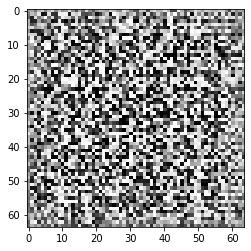

In [60]:
# 動作確認
import matplotlib.pyplot as plt
%matplotlib inline

G = Generator(z_dim=20, image_size=64)

# 入力する乱数
input_z = torch.randn(1, 20)

# テンソルサイズを(1, 20, 1, 1)に変形
input_z = input_z.view(input_z.size(0), input_z.size(1), 1, 1)

# 偽画像を出力
fake_images = G(input_z)

img_transformed = fake_images[0][0].detach().numpy()
plt.imshow(img_transformed, 'gray')
plt.show()

In [61]:
'''識別器の実装'''

class Discriminator(nn.Module):

    def __init__(self, z_dim=20, image_size=64):
        super(Discriminator, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(1, image_size, kernel_size=4,
                      stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True))
        # 白黒画像なので入力チャネルは1つだけ

        self.layer2 = nn.Sequential(
            nn.Conv2d(image_size, image_size*2, kernel_size=4,
                      stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True))

        self.layer3 = nn.Sequential(
            nn.Conv2d(image_size*2, image_size*4, kernel_size=4,
                      stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True))

        self.layer4 = nn.Sequential(
            nn.Conv2d(image_size*4, image_size*8, kernel_size=4,
                      stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True))

        self.last = nn.Conv2d(image_size*8, 1, kernel_size=4, stride=1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)

        feature = out  # 最後にチャネルを1つに集約する手前の情報
        feature = feature.view(feature.size()[0], -1)  # 2次元に変換

        out = self.last(out)

        return out, feature

In [62]:
# 動作確認
D = Discriminator(z_dim=20, image_size=64)

# 偽画像を生成
input_z = torch.randn(1, 20)
input_z = input_z.view(input_z.size(0), input_z.size(1), 1, 1)
fake_images = G(input_z)

# 偽画像をDに入力
d_out = D(fake_images)

# 出力d_outにSigmoidをかけて0から1に変換
print(nn.Sigmoid()(d_out[0]))

# feature
print(d_out[1].shape)

tensor([[[[0.5066]]]], grad_fn=<SigmoidBackward0>)
torch.Size([1, 8192])


In [63]:
def make_datapath_list():
    """学習、検証の画像データとアノテーションデータへのファイルパスリストを作成する。 """

    train_img_list = list()  # 画像ファイルパスを格納

    for img_idx in range(200):
        img_path = "./data/img_78/img_7_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

        img_path = "./data/img_78/img_8_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

    return train_img_list


class ImageTransform():
    """画像の前処理クラス"""

    def __init__(self, mean, std):
        self.data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])

    def __call__(self, img):
        return self.data_transform(img)


class GAN_Img_Dataset(data.Dataset):
    """画像のDatasetクラス。PyTorchのDatasetクラスを継承"""

    def __init__(self, file_list, transform):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        '''画像の枚数を返す'''
        return len(self.file_list)

    def __getitem__(self, index):
        '''前処理をした画像のTensor形式のデータを取得'''

        img_path = self.file_list[index]
        img = Image.open(img_path)  # [高さ][幅]白黒

        # 画像の前処理
        img_transformed = self.transform(img)

        return img_transformed


# DataLoaderの作成と動作確認

# ファイルリストを作成
train_img_list=make_datapath_list()

# Datasetを作成
mean = (0.5,)
std = (0.5,)
train_dataset = GAN_Img_Dataset(
    file_list=train_img_list, transform=ImageTransform(mean, std))

# DataLoaderを作成
batch_size = 64

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

# 動作の確認
batch_iterator = iter(train_dataloader)  # イテレータに変換
imgs = next(batch_iterator)  # 1番目の要素を取り出す
print(imgs.size())  # torch.Size([64, 1, 64, 64])

torch.Size([64, 1, 64, 64])


In [64]:
# ネットワークの初期化
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        # Conv2dとConvTranspose2dの初期化
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
    elif classname.find('BatchNorm') != -1:
        # BatchNorm2dの初期化
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)


# 初期化の実施
G.apply(weights_init)
D.apply(weights_init)

print("ネットワークの初期化完了")

ネットワークの初期化完了


In [65]:
'''損失関数と最適化関数の定義'''

# 誤差関数を定義
criterion = nn.BCEWithLogitsLoss(reduction='mean')

# 最適化手法の設定
optimizerG = torch.optim.Adam(G.parameters(), opt.lr_g, [opt.beta1, opt.beta2])
optimizerD = torch.optim.Adam(D.parameters(), opt.lr_d, [opt.beta1, opt.beta2])

In [66]:
'''パラメータを保存する関数の定義'''

def save_params(file_path, epoch, netD, netG):
    torch.save(
        netG.state_dict(),
        file_path + "/g_{:04d}.pth".format(epoch)
    )

    torch.save(
        netD.state_dict(),
        file_path + "/d_{:04d}.pth".format(epoch)
    )

In [67]:
# モデルを学習させる関数を作成

lossesD = []
lossesG = []
raw_lossesD = []
raw_lossesG = []

def train_model(G, D, dataloader, num_epochs):

    # パラメータをハードコーディング
    mini_batch_size = opt.batch_size

    # ネットワークをGPUへ
    G.to(device)
    D.to(device)

    G.train()  # モデルを訓練モードに
    D.train()  # モデルを訓練モードに

    # ネットワークがある程度固定であれば、高速化させる
    torch.backends.cudnn.benchmark = True

    # 画像の枚数
    num_train_imgs = len(dataloader.dataset)
    batch_size = dataloader.batch_size

    # イテレーションカウンタをセット
    iteration = 1

    # epochのループ
    for epoch in range(num_epochs):

        # 開始時刻を保存
        t_epoch_start = time.time()
        epoch_g_loss = 0.0  # epochの損失和
        epoch_d_loss = 0.0  # epochの損失和

        # データローダーからminibatchずつ取り出すループ
        for imgs in dataloader:

            # --------------------
            # 1. Discriminatorの学習
            # --------------------
            # ミニバッチがサイズが1だと、バッチノーマライゼーションでエラーになるのでさける
            if imgs.size()[0] == 1:
                continue

            # GPUが使えるならGPUにデータを送る
            imgs = imgs.to(device)

            # 正解ラベルと偽ラベルを作成
            # epochの最後のイテレーションはミニバッチの数が少なくなる
            mini_batch_size = imgs.size()[0]
            label_real = torch.full((mini_batch_size,), 1).to(device)
            label_fake = torch.full((mini_batch_size,), 0).to(device)

            # 真の画像を判定
            d_out_real, _ = D(imgs)

            # 偽の画像を生成して判定
            input_z = torch.randn(mini_batch_size, opt.z_dim).to(device)
            input_z = input_z.view(input_z.size(0), input_z.size(1), 1, 1)
            fake_images = G(input_z)
            d_out_fake, _ = D(fake_images)

            # 誤差を計算
            label_real = label_real.type_as(d_out_real.view(-1))
            d_loss_real = criterion(d_out_real.view(-1), label_real)
            label_fake = label_fake.type_as(d_out_fake.view(-1))
            d_loss_fake = criterion(d_out_fake.view(-1), label_fake)
            d_loss = d_loss_real + d_loss_fake

            # バックプロパゲーション
            optimizerG.zero_grad()
            optimizerD.zero_grad()

            d_loss.backward()
            optimizerD.step()

            # --------------------
            # 2. Generatorの学習
            # --------------------
            # 偽の画像を生成して判定
            input_z = torch.randn(mini_batch_size, opt.z_dim).to(device)
            input_z = input_z.view(input_z.size(0), input_z.size(1), 1, 1)
            fake_images = G(input_z)
            d_out_fake, _ = D(fake_images)

            # 誤差を計算
            g_loss = criterion(d_out_fake.view(-1), label_real)

            # バックプロパゲーション
            optimizerG.zero_grad()
            optimizerD.zero_grad()
            g_loss.backward()
            optimizerG.step()

            # --------------------
            # 3. 記録
            # --------------------
            epoch_d_loss += d_loss.item()
            epoch_g_loss += g_loss.item()
            raw_lossesD.append(epoch_d_loss)
            raw_lossesG.append(epoch_g_loss)
            iteration += 1

        # epochのphaseごとのlossと正解率
        t_epoch_finish = time.time()
        print('-------------')
        print('epoch {} || Epoch_D_Loss:{:.4f} ||Epoch_G_Loss:{:.4f}'.format(
            epoch+1, epoch_d_loss/batch_size, epoch_g_loss/batch_size))
        print('timer:  {:.4f} sec.'.format(t_epoch_finish - t_epoch_start))
        t_epoch_start = time.time()

        lossesD.append(epoch_d_loss/batch_size)
        lossesG.append(epoch_g_loss/batch_size)
        
        # パラメータ、画像を保存しない場合はコメントアウトする
        # vutils.save_image(fake_images, f_path_result + f"/{epoch+1}.jpg")
        # save_params(f_path_params, epoch, D, G)

    print("総イテレーション回数:", iteration)

    return G, D

In [68]:
# 学習・検証を実行する
G_update, D_update = train_model(G, D, dataloader=train_dataloader, num_epochs=opt.num_epochs)

-------------
epoch 1 || Epoch_D_Loss:0.1049 ||Epoch_G_Loss:0.1636
timer:  0.7936 sec.
-------------
epoch 2 || Epoch_D_Loss:0.0507 ||Epoch_G_Loss:0.2011
timer:  0.6729 sec.
-------------
epoch 3 || Epoch_D_Loss:0.0329 ||Epoch_G_Loss:0.3941
timer:  0.6582 sec.
-------------
epoch 4 || Epoch_D_Loss:0.1420 ||Epoch_G_Loss:0.0972
timer:  0.6539 sec.
-------------
epoch 5 || Epoch_D_Loss:0.0167 ||Epoch_G_Loss:0.2976
timer:  0.6586 sec.
-------------
epoch 6 || Epoch_D_Loss:0.2249 ||Epoch_G_Loss:0.2255
timer:  0.6678 sec.
-------------
epoch 7 || Epoch_D_Loss:0.1015 ||Epoch_G_Loss:0.0775
timer:  0.6603 sec.
-------------
epoch 8 || Epoch_D_Loss:0.0499 ||Epoch_G_Loss:0.1519
timer:  0.6631 sec.
-------------
epoch 9 || Epoch_D_Loss:0.0115 ||Epoch_G_Loss:0.3281
timer:  0.6549 sec.
-------------
epoch 10 || Epoch_D_Loss:0.0356 ||Epoch_G_Loss:0.4524
timer:  0.6575 sec.
-------------
epoch 11 || Epoch_D_Loss:0.2421 ||Epoch_G_Loss:0.5116
timer:  0.6573 sec.
-------------
epoch 12 || Epoch_D_Loss:0.

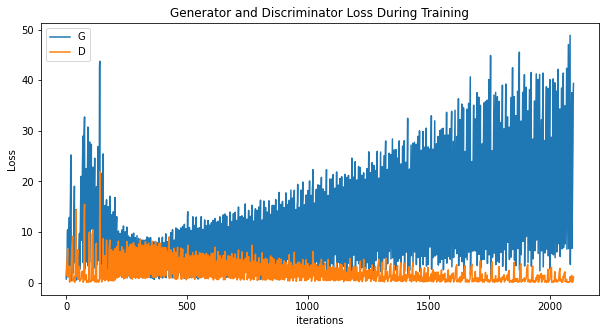

In [69]:
'''訓練イテレーションごとの損失'''

plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(raw_lossesG,label="G")
plt.plot(raw_lossesD,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

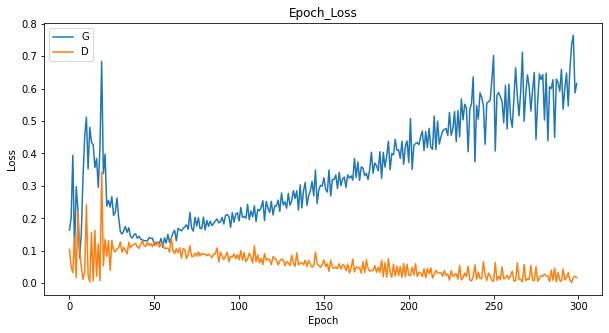

In [70]:
'''エポックごとの損失'''

plt.figure(figsize=(10,5))
plt.title("Epoch_Loss")
plt.plot(lossesG,label="G")
plt.plot(lossesD,label="D")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

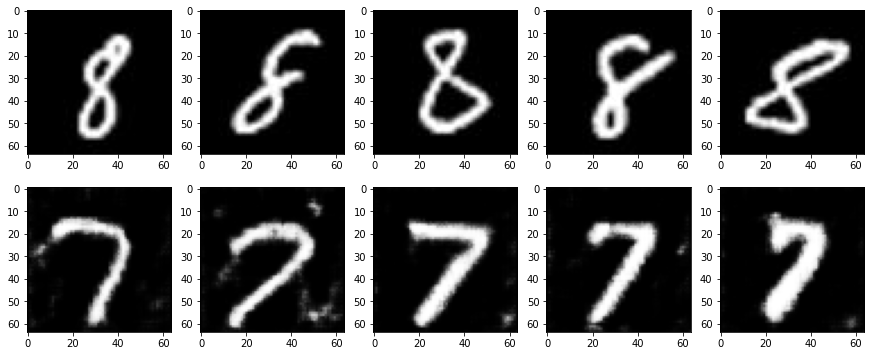

In [71]:
# 生成画像と訓練データを可視化する

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 入力の乱数生成
batch_size = 8
z_dim = 20
fixed_z = torch.randn(batch_size, z_dim)
fixed_z = fixed_z.view(fixed_z.size(0), fixed_z.size(1), 1, 1)
fake_images = G_update(fixed_z.to(device))

# 訓練データ
batch_iterator = iter(train_dataloader)  # イテレータに変換
imgs = next(batch_iterator)  # 1番目の要素を取り出す


# 出力
fig = plt.figure(figsize=(15, 6))
for i in range(0, 5):
    # 上段に訓練データを
    plt.subplot(2, 5, i+1)
    plt.imshow(imgs[i][0].cpu().detach().numpy(), 'gray')

    # 下段に生成データを表示する
    plt.subplot(2, 5, 5+i+1)
    plt.imshow(fake_images[i][0].cpu().detach().numpy(), 'gray')

In [72]:
def Anomaly_score(x, fake_img, D, Lambda=0.1):

    # テスト画像xと生成画像fake_imgのピクセルレベルの差の絶対値を求めて、ミニバッチごとに和を求める
    residual_loss = torch.abs(x-fake_img)
    residual_loss = residual_loss.view(residual_loss.size()[0], -1)
    residual_loss = torch.sum(residual_loss, dim=1)

    # テスト画像xと生成画像fake_imgを識別器Dに入力し、特徴量を取り出す
    _, x_feature = D(x)
    _, G_feature = D(fake_img)

    # テスト画像xと生成画像fake_imgの特徴量の差の絶対値を求めて、ミニバッチごとに和を求める
    discrimination_loss = torch.abs(x_feature-G_feature)
    
    discrimination_loss = torch.sum(discrimination_loss, dim=1)

    # ミニバッチごとに2種類の損失を足し算する
    loss_each = (1-Lambda)*residual_loss + Lambda*discrimination_loss

    # ミニバッチ全部の損失を求める
    total_loss = torch.sum(loss_each)

    return total_loss, loss_each, residual_loss

In [73]:
# テスト用のDataLoaderの作成


def make_test_datapath_list():
    """学習、検証の画像データとアノテーションデータへのファイルパスリストを作成する。 """

    train_img_list = list()  # 画像ファイルパスを格納

    for img_idx in range(5):
        img_path = "./data/test/img_7_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

        img_path = "./data/test/img_8_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

        img_path = "./data/test/img_2_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

    return train_img_list


# ファイルリストを作成
test_img_list = make_test_datapath_list()

# Datasetを作成
mean = (0.5,)
std = (0.5,)
test_dataset = GAN_Img_Dataset(
    file_list=test_img_list, transform=ImageTransform(mean, std))

# DataLoaderを作成
batch_size = 5

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False)

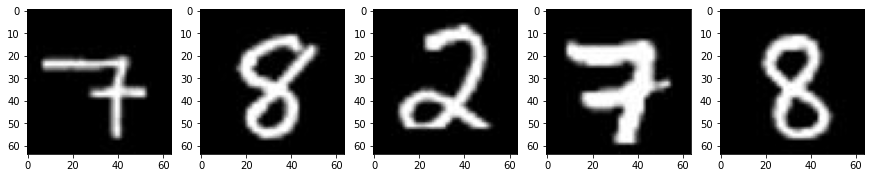

In [74]:
# テストデータの確認
batch_iterator = iter(test_dataloader)  # イテレータに変換
imgs = next(batch_iterator)  

# 1番目のミニバッチを取り出す

fig = plt.figure(figsize=(15, 6))
for i in range(0, 5):
    plt.subplot(2, 5, i+1)
    plt.imshow(imgs[i][0].cpu().detach().numpy(), 'gray')

In [75]:
# 異常検知したい画像
x = imgs[0:5]
x = x.to(device)

# 異常検知したい画像を生成するための、初期乱数
z = torch.randn(5, 20).to(device)
z = z.view(z.size(0), z.size(1), 1, 1)

# 変数zを微分を求めることが可能なように、requires_gradをTrueに設定
z.requires_grad = True

# 変数zを更新できるように、zの最適化関数を求める
optimizerZ = torch.optim.Adam([z], lr=1e-3)


# zを求める
for epoch in range(5000+1):
    fake_img = G_update(z)
    loss, _, _ = Anomaly_score(x, fake_img, D_update, Lambda=0.1)

    optimizerZ.zero_grad()
    loss.backward()
    optimizerZ.step()

    if epoch % 1000 == 0:
        print(f'epoch {epoch+1} || loss_total:{loss.item():.0f} ')

epoch 1 || loss_total:7300 
epoch 1001 || loss_total:4513 
epoch 2001 || loss_total:3241 
epoch 3001 || loss_total:2735 
epoch 4001 || loss_total:2432 
epoch 5001 || loss_total:2344 


total loss： [335. 302. 761. 545. 402.]


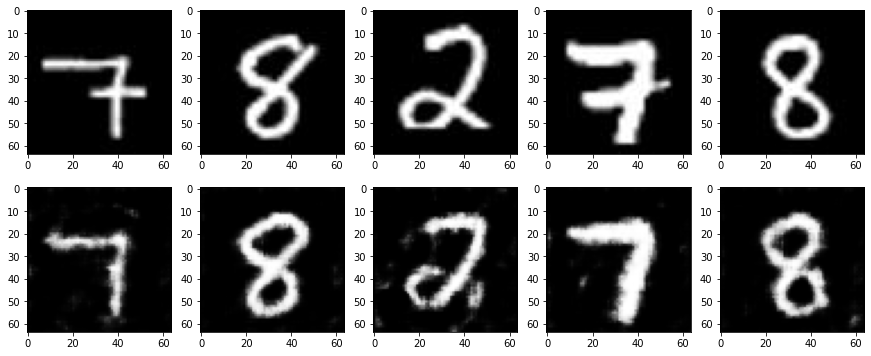

In [77]:
# 画像を生成
G_update.eval()
fake_img = G_update(z)

# 損失を求める
loss, loss_each, residual_loss_each = Anomaly_score(
    x, fake_img, D_update, Lambda=0.1)

# 損失の計算。トータルの損失
loss_each = loss_each.cpu().detach().numpy()
print("total loss：", np.round(loss_each, 0))

# 画像を可視化
fig = plt.figure(figsize=(15, 6))
for i in range(0, 5):
    # 上段にテストデータを
    plt.subplot(2, 5, i+1)
    plt.imshow(imgs[i][0].cpu().detach().numpy(), 'gray')

    # 下段に生成データを表示する
    plt.subplot(2, 5, 5+i+1)
    plt.imshow(fake_img[i][0].cpu().detach().numpy(), 'gray')